<h1>A refined analysis of binned PADs</h1>

In [1]:
import numpy                   as np
import scipy                   as sp
import scipy.signal            as sig
import matplotlib.gridspec     as gridspec
import matplotlib.pyplot       as plt
import matplotlib.font_manager as font_manager
import spacepy.pycdf           as pycdf
import datetime                as dt
import PAD
%matplotlib inline

In [2]:
def compute_ave_number_flux(jN,time_label,energy_label):
    ave_jN = np.average(jN[time_label,:,:,energy_label],axis=0)
    
    return ave_jN

In [3]:
def compute_limited_PAD(time_label,minE,maxE,minPA,maxPA):
    Edata                     = parms['Erg'][minE:maxE]
    pitch_angles              = PAD.calculate_pitch_angles(v_dirs,bfield,time_label)
    flat_PA                   = np.ndarray.flatten(pitch_angles)
    FAC                       = np.zeros(len(range(minE,maxE)))
    counter                   = 0
    for energy_label in range(minE,maxE):
        local_jN              = np.ndarray.flatten(jN[time_label,:,:,energy_label])
        PA_table              = np.array(zip(flat_PA,local_jN))
        PA_range              = np.where( (flat_PA > minPA) & (flat_PA < maxPA))
        FAC[counter]          = np.average(PA_table[PA_range][:,1])
        counter              += 1        
        
    return Edata, FAC

In [4]:
def scan_PADs(time_label,time_range_str):
    minE       = 1
    maxE       = 30

    omni       = np.zeros(len(range(minE,maxE)))
    counter    = 0
    for energy_label in range(minE,maxE):
        local_jN              = np.ndarray.flatten(jN[time_label,:,:,energy_label])
        omni[counter]         = np.average(local_jN)
        counter              += 1
    
    fig1,axes  = plt.subplots(nrows=3,ncols=3,figsize=(9,9),sharex=True,sharey=True) 
    plt.subplots_adjust(hspace=0.0, wspace=0.0)
    for i in range(0,9):
        minPA      = i*20.0
        maxPA      = (i+1)*20.0
        row        = int(np.floor(i/3))
        col        = i%3
        Edata, FAC = compute_limited_PAD(time_label,minE,maxE,minPA,maxPA)
        axes[row][col].loglog(Edata,FAC,'r-',linewidth = 3.0)
        axes[row][col].loglog(Edata,omni,'b-')
        axes[row][col].set_xlim([1e1,1e5])
        axes[row][col].set_ylim([1e2,1e6])
        axes[row][col].xaxis.set_ticks([1e1,1e2,1e3,1e4,1e5])      
        axes[row][col].yaxis.set_ticks([1e2,1e3,1e4,1e5,1e6])
        annotation_string = r'$%2.0f\degree \geq \alpha \geq %2.0f\degree$' % (minPA,maxPA)
        axes[row][col].annotate(annotation_string,xy=(2e2,2e5))
    big_ax = fig1.add_subplot(111)
    big_ax.set_axis_bgcolor('none')
    big_ax.tick_params(labelcolor='none',top='off',bottom='off',left='off',right='off')
    big_ax.spines['top'].set_color('none')
    big_ax.spines['bottom'].set_color('none')
    big_ax.spines['left'].set_color('none')
    big_ax.spines['right'].set_color('none')
    big_ax.set_ylabel('Differential Number flux (s^-1 cm^-2 eV^-1)',**axis_font)
    big_ax.set_xlabel('Energy (eV)', **axis_font)
    title_string = 'Binned PADs for %s\n (red -binned, blue-omnidirectional)' % edist['Epoch'][time_label]
    big_ax.set_title(title_string, **title_font)
    fig1.tight_layout()    
    filename = 'c:/users/cschiff/Documents/'+time_range_str+'_%i.png' % time_label
    fig1.savefig(filename,dpi=300)
    fig1.clf()

In [10]:
date = 'Oct 26 0400'
if date == 'Dec 5 1200':
    DES_dist   = pycdf.CDF('c:/Yuggoth/Dec 5/mms1_fpi_fast_l2_des-dist_20151205120000_v2.1.0.cdf')
    DES_debug  = pycdf.CDF('c:/Yuggoth/Dec 5/mms1_fpi_fast_l2pre_des-debug_20151205120000_v2.1.0.cdf')
    DES_counts = pycdf.CDF('c:/Yuggoth/Dec 5/mms1_fpi_fast_l1a_des-cnts_20151205120000_v2.1.0.cdf')
if date == 'Dec 5 2200':
    DES_dist   = pycdf.CDF('c:/Yuggoth/Dec 5/mms1_fpi_fast_l2_des-dist_20151205220000_v2.1.0.cdf')
    DES_debug  = pycdf.CDF('c:/Yuggoth/Dec 5/mms1_fpi_fast_l2pre_des-debug_20151205220000_v2.1.0.cdf')
if date == 'Oct 26 0400':
    DES_dist   = pycdf.CDF('c:/Yuggoth/Oct 26/mms1_fpi_fast_l2_des-dist_20151026040000_v2.1.0.cdf')
    DES_debug  = pycdf.CDF('c:/Yuggoth/Oct 26/mms1_fpi_fast_l2pre_des-debug_20151026040000_v2.0.0.cdf')
    DES_counts = pycdf.CDF('c:/Yuggoth/Oct 26/mms1_fpi_fast_l1a_des-cnts_20151026040000_v2.0.0.cdf')
if date == 'Oct 26 0600':
    DES_dist   = pycdf.CDF('c:/Yuggoth/Oct 26/mms1_fpi_fast_l2_des-dist_20151026060000_v2.1.0.cdf')
    DES_debug  = pycdf.CDF('c:/Yuggoth/Oct 26/mms1_fpi_fast_l2pre_des-debug_20151026060000_v2.1.0.cdf')
if date == 'Oct 26 1200':
    DES_dist   = pycdf.CDF('c:/Yuggoth/Oct 26/mms1_fpi_fast_l2_des-dist_20151026120000_v2.1.0.cdf')
    DES_debug  = pycdf.CDF('c:/Yuggoth/Oct 26/mms1_fpi_fast_l2pre_des-debug_20151026120000_v2.1.0.cdf')    

In [11]:
#%%timeit -n1
edist, parms          = PAD.unpack_FS_dist_CDF(DES_dist,'mms1','des')
bfield                = PAD.fetch_magnetic_field(DES_debug,'mms1','des')
v_dirs                = PAD.calculate_look_directions(parms)
counts                = PAD.compute_counts(edist)
jN                    = PAD.compute_number_flux(edist,parms)
raw_counts            = np.asarray(DES_counts['mms1_des_fastSkyMap_cnts'])

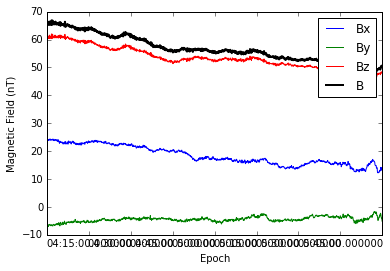

In [12]:
plt.plot(edist['Epoch'], bfield['Bx']*bfield['B'], label='Bx', linewidth=1.0)
plt.plot(edist['Epoch'], bfield['By']*bfield['B'], label='By', linewidth=1.0)
plt.plot(edist['Epoch'], bfield['Bz']*bfield['B'], label='Bz', linewidth=1.0)
plt.plot(edist['Epoch'], bfield['B'],              'k-', label='B',  linewidth=2.0)
plt.xlabel('Epoch')
plt.ylabel('Magnetic Field (nT)')
plt.legend()

In [13]:
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}

# Set the font properties (for use in legend)   
font_path = 'C:\Windows\Fonts\Arial.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=14)

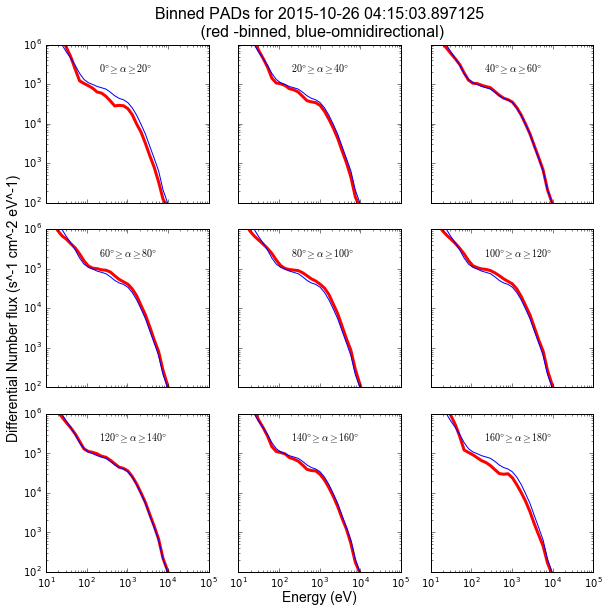

In [14]:
time_label = 200
minE       = 1
maxE       = 30

omni       = np.zeros(len(range(minE,maxE)))
counter    = 0
for energy_label in range(minE,maxE):
    local_jN              = np.ndarray.flatten(jN[time_label,:,:,energy_label])
    omni[counter]         = np.average(local_jN)
    counter              += 1
    
fig1,axes  = plt.subplots(nrows=3,ncols=3,figsize=(9,9),sharex=True,sharey=True) 
plt.subplots_adjust(hspace=0.0, wspace=0.0)
for i in range(0,9):
    minPA      = i*20.0
    maxPA      = (i+1)*20.0
    row        = int(np.floor(i/3))
    col        = i%3
    Edata, FAC = compute_limited_PAD(time_label,minE,maxE,minPA,maxPA)
    axes[row][col].loglog(Edata,FAC,'r-',linewidth = 3.0)
    axes[row][col].loglog(Edata,omni,'b-')
    axes[row][col].set_xlim([1e1,1e5])
    axes[row][col].set_ylim([1e2,1e6])
    axes[row][col].xaxis.set_ticks([1e1,1e2,1e3,1e4,1e5])      
    axes[row][col].yaxis.set_ticks([1e2,1e3,1e4,1e5,1e6])
    annotation_string = r'$%2.0f\degree \geq \alpha \geq %2.0f\degree$' % (minPA,maxPA)
    axes[row][col].annotate(annotation_string,xy=(2e2,2e5))
big_ax = fig1.add_subplot(111)
big_ax.set_axis_bgcolor('none')
big_ax.tick_params(labelcolor='none',top='off',bottom='off',left='off',right='off')
big_ax.spines['top'].set_color('none')
big_ax.spines['bottom'].set_color('none')
big_ax.spines['left'].set_color('none')
big_ax.spines['right'].set_color('none')
big_ax.set_ylabel('Differential Number flux (s^-1 cm^-2 eV^-1)',**axis_font)
big_ax.set_xlabel('Energy (eV)', **axis_font)
title_string = 'Binned PADs for %s\n (red -binned, blue-omnidirectional)' % edist['Epoch'][time_label]
big_ax.set_title(title_string, **title_font)
fig1.tight_layout()    
fig1.savefig('c:/users/cschiff/My Documents/Oct')

In [64]:
len(edist['Epoch'])

1600

In [30]:
#for i in range(0,1600,10):
#    scan_PADs(i,'Oct_26-1200-1400')
#    print i

In [15]:
time_label            = 0
minE                  = 3
maxE                  = 31
Edata                 = parms['Erg'][minE:maxE]
pitch_angles          = PAD.calculate_pitch_angles(v_dirs,bfield,time_label)
flat_PA               = np.ndarray.flatten(pitch_angles)
PAD_top               = np.zeros(len(range(minE,maxE)))
PAD_bot               = np.zeros(len(range(minE,maxE)))
mid                   = np.zeros(len(range(minE,maxE)))
counter               = 0
for energy_label in range(minE,maxE):
    local_jN              = np.ndarray.flatten(jN[time_label,:,:,energy_label])
    mid[counter]          = np.average(local_jN)   
    PA_table              = np.array(zip(flat_PA,local_jN))
    PA_range              = np.where( (flat_PA > 40.0) & (flat_PA < 60.0))
    PAD_bot[counter]      = np.average(PA_table[PA_range][:,1])
    PA_range              = np.where( (flat_PA > 120.0) & (flat_PA < 140.0))
    PAD_top[counter]      = np.average(PA_table[PA_range][:,1])
    counter              += 1

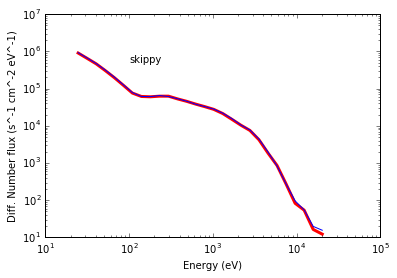

In [17]:
plt.loglog(Edata,PAD_bot,'r-',linewidth = 3.0)
plt.loglog(Edata,PAD_top,'b-')
plt.xlabel('Energy (eV)')
plt.ylabel('Diff. Number flux (s^-1 cm^-2 eV^-1)')
plt.xlim([10,100000])
plt.ylim([10,10000000])
plt.annotate('skippy',xy=(100,500000))

Raw counts = 79227 and computed counts = 79269
B magnitude:  65.96875 nT
2015-10-26 04:00:03.891987


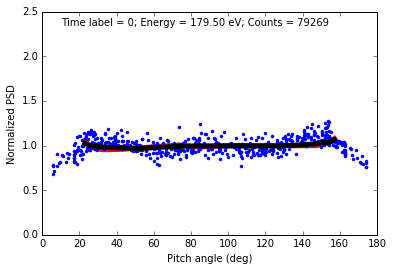

In [85]:
time_label            = 0
energy_label          = 11
pitch_angles          = PAD.calculate_pitch_angles(v_dirs,bfield,time_label)
ave_pitch_angles, std = PAD.calculate_average_pitch_angles(pitch_angles)
f                     = PAD.fetch_PSD(edist,time_label,energy_label)
ave_f                 = PAD.fetch_ave_PSD(edist,time_label,energy_label)
ljN                   = compute_ave_number_flux(jN,time_label,energy_label)
flat_pitch_angles     = np.ndarray.flatten(pitch_angles)
flat_f                = np.ndarray.flatten(f)
f_mean                = np.average(f)
slice_counts          = counts[time_label,:,:,energy_label].sum()
raw_slice_counts      = raw_counts[time_label,:,:,energy_label].sum()
plt.plot(ave_pitch_angles,ave_f/f_mean,'r-',linewidth=5.0)
plt.plot(flat_pitch_angles,flat_f/f_mean,'b.')
plt.plot(ave_pitch_angles,sig.savgol_filter(ave_f/f_mean,9,2),'k-',linewidth=5.0)
plt.xlabel('Pitch angle (deg)')
plt.ylabel('Normalized PSD')
plt.axis([0,180,0.0,2.5])
temp_str = 'Time label = %i; Energy = %2.2f eV; Counts = %d' % (time_label, parms['Erg'][energy_label], slice_counts)
plt.annotate(temp_str,xy=(10,2.35))
print 'Raw counts = %i and computed counts = %i' % (raw_slice_counts, slice_counts)
print 'B magnitude: ', bfield['B'][time_label], 'nT'
print edist['Epoch'][time_label]

In [90]:
print np.average(local_jN)

60564.6103961


In [87]:
Edata                     = parms['Erg'][minE:maxE]
pitch_angles              = PAD.calculate_pitch_angles(v_dirs,bfield,time_label)
flat_PA                   = np.ndarray.flatten(pitch_angles)
local_jN                  = np.ndarray.flatten(jN[time_label,:,:,energy_label])
PA_table                  = np.array(zip(flat_PA,local_jN))
PA_range                  = np.where( (flat_PA >= 0) & (flat_PA <= 180))
FAC                       = np.average(PA_table[PA_range][:,1])
print parms['Erg'][energy_label], slice_counts, FAC, np.sum(jN[time_label,:,:,energy_label]), FAC/np.sum(jN[time_label,:,:,energy_label])

179.497 79269.4 60564.6103961 31009080.5228 0.001953125


60564.6103961 57688.7244191 65270.1641525 1.13141978454


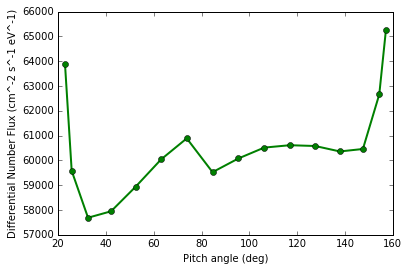

In [88]:
plt.plot(ave_pitch_angles,ljN,'go-',linewidth=2.0)
plt.xlabel('Pitch angle (deg)')
plt.ylabel('Differential Number Flux (cm^-2 s^-1 eV^-1)')
print np.average(ljN), np.min(ljN), np.max(ljN), np.max(ljN)/np.min(ljN)

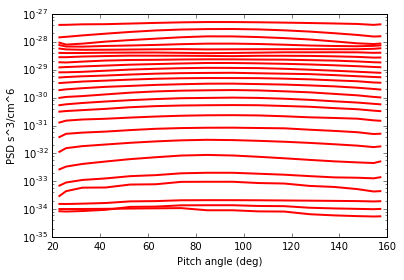

In [31]:
time_label            = 0
pitch_angles          = PAD.calculate_pitch_angles(v_dirs,bfield,time_label)
ave_pitch_angles, std = PAD.calculate_average_pitch_angles(pitch_angles)
flat_pitch_angles     = np.ndarray.flatten(pitch_angles)
for energy_label in range(7,32):
    ave_f                 = PAD.fetch_ave_PSD(edist,time_label,energy_label)
    ljN                   = compute_ave_number_flux(jN,time_label,energy_label)   
    plt.semilogy(ave_pitch_angles,ave_f,'r-',linewidth=2.0)
    #plt.semilogy(ave_pitch_angles,sig.savgol_filter(ave_f,9,2),'k-',linewidth=1.0)
    slice_counts          = counts[time_label,:,:,energy_label].sum()
    raw_slice_counts      = raw_counts[time_label,:,:,energy_label].sum()
    temp_str = 'Time label = %i; Energy = %2.2f eV; Counts = %d' % (time_label, parms['Erg'][energy_label], slice_counts)
    plt.annotate(temp_str,xy=(10,2.35))
plt.xlabel('Pitch angle (deg)')
plt.ylabel('PSD s^3/cm^6')

In [77]:
parms['Erg'][11:14]

array([ 179.49699402,  230.18600464,  295.18899536], dtype=float32)

In [90]:
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
from scipy.optimize import leastsq

In [233]:
def func(x,a,b):
    return a * x * np.exp(-x/b)

In [238]:
y     = func(Edata,7700.0,66)
print Edata[0], mid[0], y[0]

66.37 187661.96875 186953.0


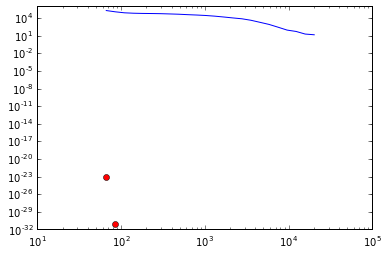

In [228]:
plt.loglog(Edata,mid,'b-')
plt.loglog(Edata,y,'ro')

In [217]:
popt, pcov = curve_fit(func, Edata, mid,(30.0,1.0/1400.0))

In [218]:
popt

array([  3.00000000e+01,   7.14285714e-04])

In [219]:
pcov

array([[ inf,  inf],
       [ inf,  inf]])

In [220]:
yfit = func(Edata,popt[0],popt[1])

In [222]:
1.0/1400.0

0.0007142857142857143

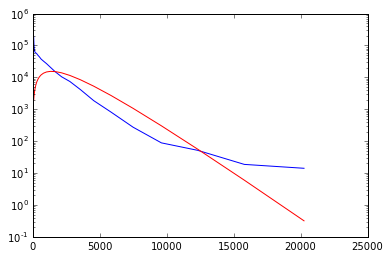

In [221]:
plt.semilogy(Edata,mid,'b-')
plt.semilogy(Edata,yfit,'r-')

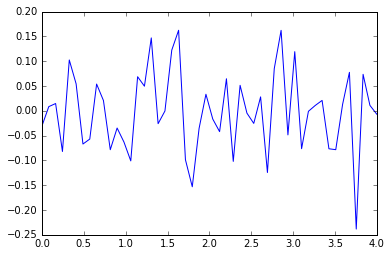

In [145]:
plt.plot(xdata,yfit-ydata)

In [239]:
def residual(vars, x, data, eps_data):
    amp        = var[0]
    phaseshift = var[1]
    freq       = var[2]
    decay      = vars[3]
    
    model = amp * sin(x * freq + phaseshift) * exp(-x*x*decay)
    
    return (data-model)/eps_data

In [240]:
vars = [10.0, 0.2, 3.0, 0.007]

In [241]:
out = leastsq(residual,vars, args=(x, data, eps_data))

NameError: name 'x' is not defined

In [122]:
pwd

u'C:\\Users\\cschiff\\Python'

In [64]:
DES_debug['mms1_des_numberdensity_dbcs_fast'][0]

array(2.0834033489227295, dtype=float32)